# Classifying the Risk Intensity Level for Maternal Mortality during Pregnancy

### Introduction

Reducing maternal mortality falls under the UN’s Third Sustainability Goal: good health and wellbeing. Significant risk factors that are responsible for maternal mortality during pregnancy are age, Systolic Blood Pressure (BP) and Diastolic Blood Pressure, Blood Sugar, Body Temperature, and Heart Rate. Age refers to age in years of the pregnant woman, systolic BP is the pressure in your arteries when your heart beats in mmHg, diastolic BP is the pressure in the arteries when the heart rests between beats in mmHg, body temperature is the resting body temperature in degrees fahrenheit, blood sugar is the blood glucose level in mmol/L, and heart rate is the resting heart rate in beats per minute. High Diastolic BP, Systolic BP, and heart rate places high strain on the heart such that it can fail and low values for these causes a lack of blood circulation. Low blood sugar can starve the brain of oxygen while high blood sugar can lead to toxic acids in the brain. These factors were measured in different hospitals, community clinics and maternal health care clinics in Bangladesh and collected using the loT based risk monitoring system. The IoT based risk monitoring system is an internet network containing the data from the mechanical and digital machines and the human data using a unique identifier. 1014 pregnancies were classified for their risk intensity level on a case-by-case basis based on midwifery assessments. 

#### Predictive Question
Using this data set, we aim to answer the question of what is the risk intensity level (high, medium, low) for maternal mortality during pregnancy based on these risk factors? 

### Preliminary Exploratory Data Analysis 

In Table 1, the distribution of the three risk levels for maternal mortality was tabulated to determine the spread of data across the classes. In table 2, the total number of NA values across the training set was calculated to determine if there was any data missing in the observations. In table 3 to 5, shows the range (max and min) of the chosen variables (age, systolic BP, diastolic BP, and blood sugar) for high risk, mid risk and low risk pregnancies, respectively. Graphs 1 to 4 show the distribution of the data for each chosen variable using a histogram. The risk level for maternal mortality was visualized using different colors. 

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [11]:
maternal_health_dataset <- read_csv("https://raw.githubusercontent.com/aniketc12/maternal_risk/main/data/maternal_health_risk.csv")
maternal_health_dataset <- maternal_health_dataset |>
    mutate(RiskLevel =as_factor(RiskLevel)) |>
    select(!c(HeartRate, BodyTemp))

Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
maternal_split <- initial_split(maternal_health_dataset, prop = 0.75, strata = RiskLevel)
training_set <- training(maternal_split)
testing_set <- testing(maternal_split)

In [13]:
risk_distribution <- training_set |>
group_by(RiskLevel) |>
summarize(n=n())

In [5]:
na <- tibble(number_of_na_values = sum(is.na(training_set)))

In [14]:
min_vals_high <- training_set |>
    filter(RiskLevel == "high risk") |> 
    map_df(min) 

max_vals_high <- training_set |>
    filter(RiskLevel == "high risk") |>
    map_df(max)

min_vals_mid <- training_set |>
    filter(RiskLevel == "mid risk") |>
    map_df(min) 
max_vals_mid <- training_set |>
    filter(RiskLevel == "mid risk") |>
    map_df(max)

min_vals_low <- training_set |>
    filter(RiskLevel == "low risk") |>
    map_df(min) 

max_vals_low <- training_set |>
    filter(RiskLevel == "low risk") |>
    map_df(max)

ERROR: Error in Summary.factor(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, : ‘min’ not meaningful for factors


In [15]:
age_histogram <-  ggplot(training_set, aes(x = Age)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Age (years)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Age")



systolic_histogram <-  ggplot(training_set, aes(x = SystolicBP)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Systolic Blood Pressure (mmHg)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Systolic BP")

diastolic_histogram <-  ggplot(training_set, aes(x = DiastolicBP)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Diastolic Blood Pressure (mmHg)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Diastolic BP")

bs_histogram <- ggplot(training_set, aes(x = BS)) + 
geom_histogram(bins = 7, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Blood Sugar (mmol / L)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Blood Sugar")


RiskLevel,n
<fct>,<int>
high risk,204
low risk,304
mid risk,252


number_of_na_values
<int>
0


Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp",
"HeartRate", "RiskLevel")


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12,83,60,6.1,98,60,high risk
65,160,100,19.0,103,90,high risk


Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp",
"HeartRate", "RiskLevel")


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,70,50,6,98,60,mid risk
60,140,100,18,103,88,mid risk


Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp",
"HeartRate", "RiskLevel")


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,70,49,6,98,7,low risk
70,129,95,11,103,88,low risk


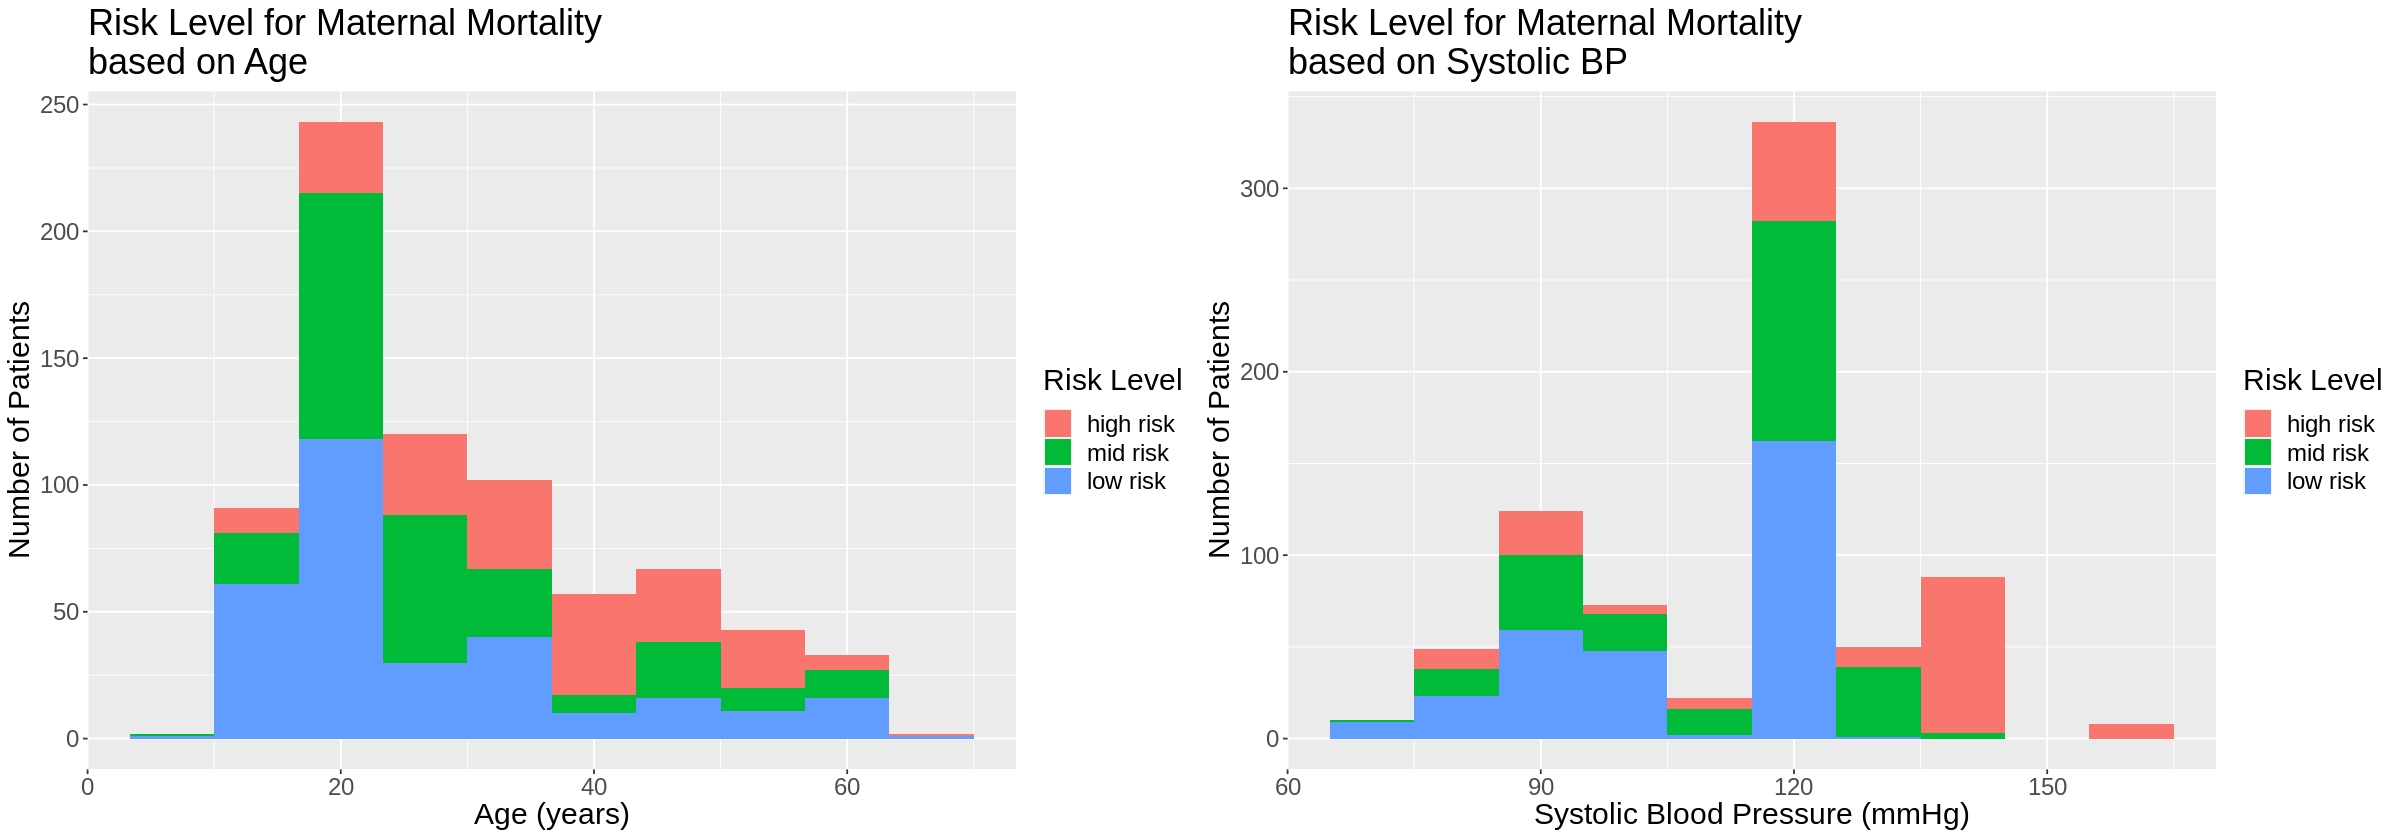

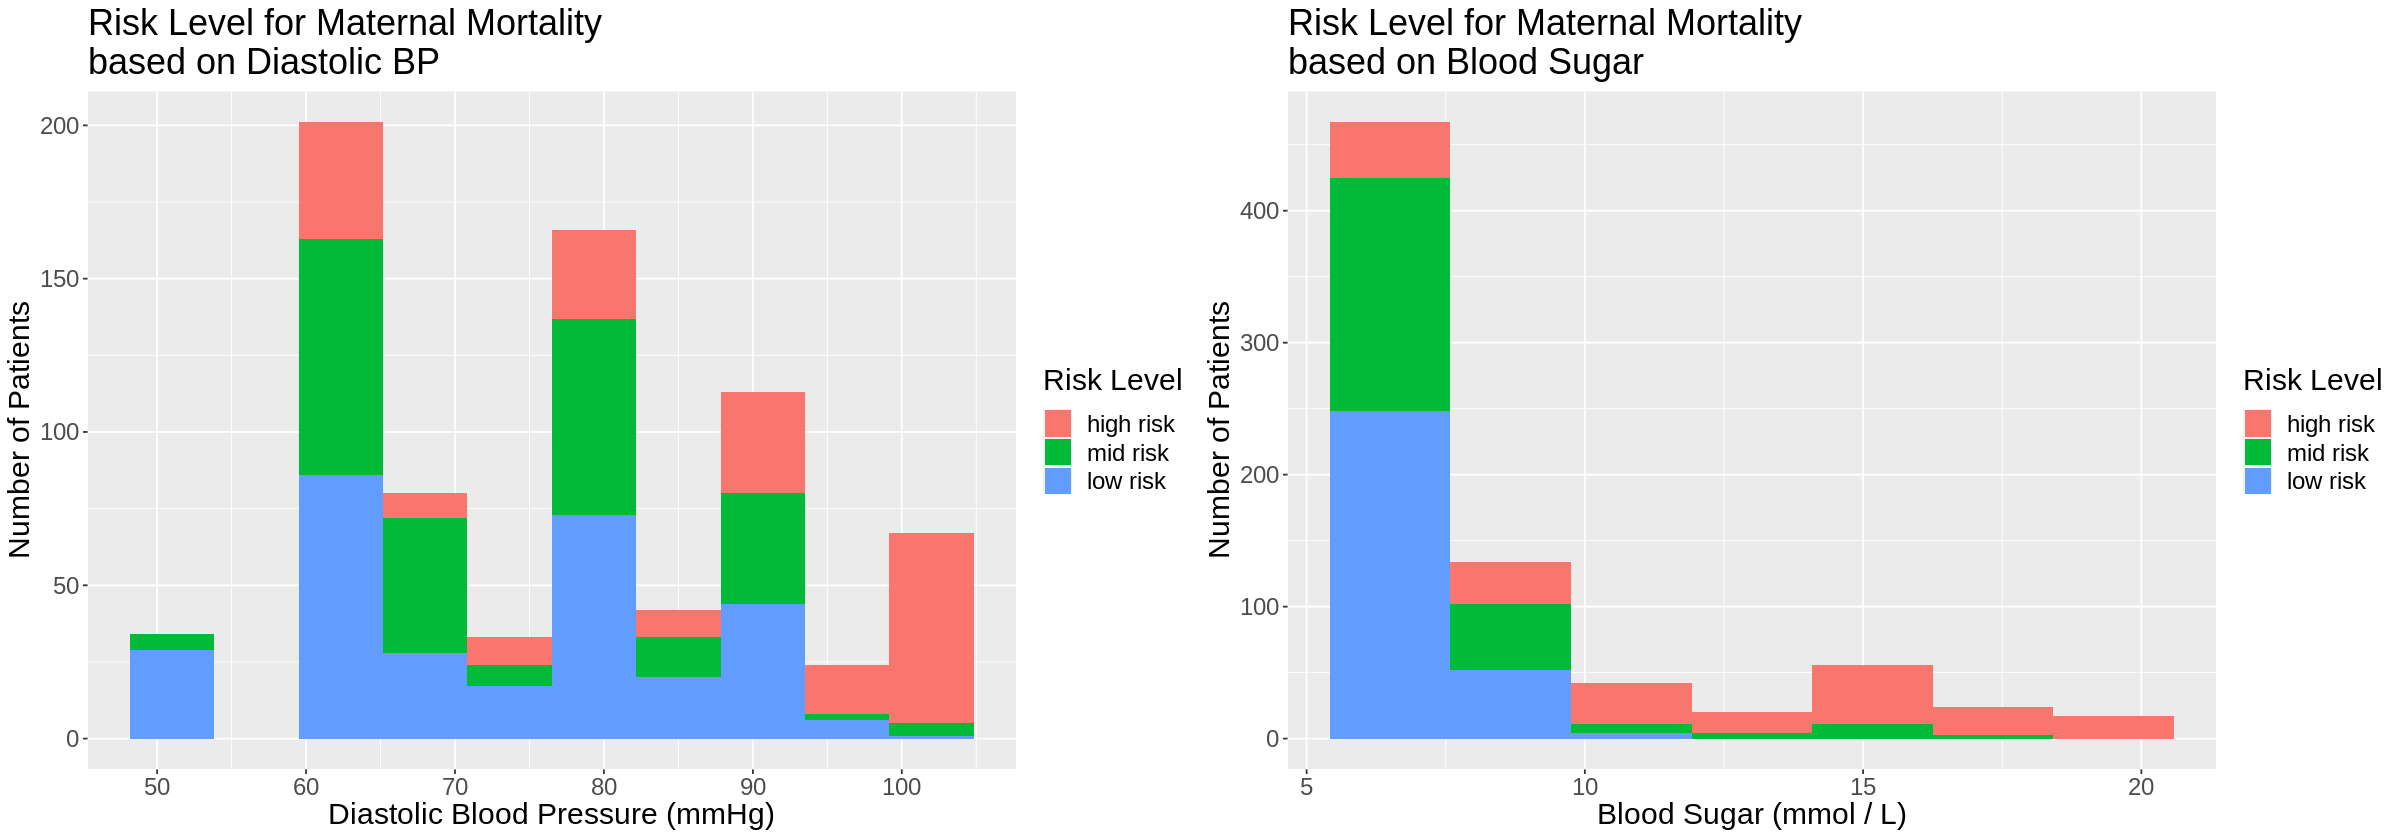

In [17]:
risk_distribution

na

full_join(min_vals_high, max_vals_high)
full_join(min_vals_mid, max_vals_mid)
full_join(min_vals_low, max_vals_low)

options(repr.plot.height = 7, repr.plot.width = 20)
grid.arrange(age_histogram, systolic_histogram, nrow = 1)
grid.arrange(diastolic_histogram, bs_histogram, nrow = 1)

Table 1 shows that the number of data points for each class is relatively equal, so no further balancing of data is needed. Table 2 shows that none of the observations contain an NA value, therefore all observations provide the necessary data for our classification. Tables 3-4 show that the max and min of the four chosen variables does not differ drastically between the classes. Graphs 1 to 4 showed that there are correlations between each variable and the risk level for maternal mortality.

### Methods

To conduct our data analysis, we will create appropriate tables and visualizations based on our chosen variables. We will then use the KNN classification algorithm to determine the risk level for maternal mortality. We will perform a 5-fold cross-validation to determine which value of K to use. Using this K value, we will perform our classification and gather its accuracy. The variables we will use to perform our analysis are age, systolic BP, diastolic BP, and blood sugar. This was chosen by first, visualizing the distribution of the classes for each variable individually. From this, we chose the variables that displayed the greatest correlation with the classes. These variables also aligned with our intuitive knowledge of the severity of each risk factor. 

To visualize our results, we will collect the metrics for the classifier and determine its accuracy in correctly classifying the risk level. We will use a confusion matrix to compare the true vs predicted class to determine the number of errors and what kind of errors the classifier is making in its predictions (ie. classifying lower risks as higher risk or the opposite). In addition, we will utilize a bar graph to visualize how accurate the classifier is at predicting each class, along with the number of false positives and false negatives.  

### Expected Outcomes and Significance